In [21]:
%reload_ext autoreload
%autoreload 2

In [1]:
from langchain_core.documents import Document
from datasets import load_dataset

dataset = load_dataset("cnn_dailymail", "3.0.0", split="validation[:1000]", cache_dir="./cache")

articles = [Document(page_content=item['article'], metadata={"id": item['id']}) for item in dataset]

In [11]:
article_slice = articles[200:250]

In [32]:
article_slice = articles[800:850]

In [34]:
len(articles)

1000

In [35]:
len(article_slice)

50

In [36]:
from ragas.testset.generator import TestsetGenerator
from ragas.testset.evolutions import simple, reasoning, multi_context
from langchain_openai import ChatOpenAI, OpenAIEmbeddings

# generator with openai models
generator_llm = critic_llm = ChatOpenAI(model="gpt-3.5-turbo-16k")
# critic_llm = ChatOpenAI(model="gpt-4")
embeddings = OpenAIEmbeddings()

generator = TestsetGenerator.from_langchain(
    generator_llm,
    critic_llm,
    embeddings
)

# generate testset
testset = generator.generate_with_langchain_docs(article_slice, test_size=6, distributions={simple: 0.33, reasoning: 0.34, multi_context: 0.33})

embedding nodes:   0%|          | 0/138 [00:00<?, ?it/s]

Filename and doc_id are the same for all nodes.


Generating:   0%|          | 0/6 [00:00<?, ?it/s]

max retries exceeded for SimpleEvolution(generator_llm=LangchainLLMWrapper(run_config=RunConfig(timeout=60, max_retries=15, max_wait=90, max_workers=16, thread_timeout=80.0, exception_types=<class 'openai.RateLimitError'>, log_tenacity=False)), docstore=InMemoryDocumentStore(splitter=<langchain_text_splitters.base.TokenTextSplitter object at 0x7faeff36c2e0>, nodes=[Node(metadata={'id': '41263a8b04982ef612ad0e059a7d5f6af830e454'}, page_content='(CNN)In September 2002, then-former Israeli Prime Minister Benjamin Netanyahu told a U.S. congressional committee "there is absolutely no question whatsoever" that Saddam Hussein\'s Iraq was developing nuclear weapons at "portable manufacturing sites of mass death." Once Hussein had nuclear weapons, Netanyahu warned, "the terror network will have nuclear weapons," placing "the security of the entire world at risk." Fast forward to this week, and Netanyahu was back, this time as prime minister, to make virtually identical claims about Iran. Yet no

In [2]:
import pandas as pd
synthetic = testset.to_pandas()
# make the datas all shown 
# pd.set_option('display.max_colwidth', None)
# revert back the display of the dataframe
pd.reset_option('display.max_colwidth')
synthetic.head(10)

NameError: name 'testset' is not defined

In [38]:
timestamp = pd.Timestamp.now().strftime("%Y%m%d-%H%M%S")
synthetic.to_csv(f"/teamspace/studios/this_studio/RAG-System-Optimization/data/{timestamp}testset.csv", index=False)

In [43]:
import pandas as pd

# File paths
file_paths = [
    '/teamspace/studios/this_studio/RAG-System-Optimization/data/20240727-103933testset.csv',
    '/teamspace/studios/this_studio/RAG-System-Optimization/data/20240727-104955testset.csv',
    '/teamspace/studios/this_studio/RAG-System-Optimization/data/init_test_data.csv',
    '/teamspace/studios/this_studio/RAG-System-Optimization/data/20240727-103510testset.csv'
]

# Reading all CSV files into dataframes
dataframes = [pd.read_csv(file) for file in file_paths]

# Merging all dataframes into one
merged_dataframe = pd.concat(dataframes, ignore_index=True)

# Saving the merged dataframe to a new CSV file
merged_file_path = '/teamspace/studios/this_studio/RAG-System-Optimization/data/merged_testset.csv'
merged_dataframe.to_csv(merged_file_path, index=False)

merged_file_path

'/teamspace/studios/this_studio/RAG-System-Optimization/data/merged_testset.csv'

In [3]:
merged_dataframe = pd.read_csv('/teamspace/studios/this_studio/RAG-System-Optimization/data/merged_testset.csv')

In [4]:
merged_dataframe.head(15)

question  \
0   What group is responsible for the attack in Ba...   
1   What factors have contributed to the sharp dec...   
2   What factors contribute to considering the del...   
3   Who was the founding prime minister of Singapo...   
4   What is the term used to describe the overuse ...   
5   What is the role of probate judges in the same...   
6   What are the risks and controversies associate...   
7   What is Mohammed Emwazi's background and how d...   
8   What significant achievement did the Iraqi for...   
9   How does the hukou system impact left-behind c...   
10  What measures can be taken to improve security...   
11  What is Netanyahu's stance on the two-state so...   

                                             contexts  \
0   ['Mogadishu, Somalia (CNN)Islamic militants wi...   
1   ['Lagos, Nigeria (CNN)It\'s a unique world whe...   
2   ['(CNN)As relatives and friends mourn the loss...   
3   ['(CNN)Thousands of Singaporeans gathered in p...   
4   ['(CNN)Modern women are suffering from an ener...   
5   ['(CNN)The Alabama Supreme Court on Tuesday or...   
6   ['(CNN)CNN has learned that the manufacturer o...   
7   ['(CNN)A man who says he\'s Mohammed Emwazi\'s...   
8   (CNN)Iraqi forces say they've captured key are...   
9   Chao Hu, Anhui, China (CNN)Six-year-old Lu Yim...   
10  ['(CNN)As relatives and friends mourn the loss...   
11  ['Jerusalem (CNN)Within 48 hours of his electi...   

                                         ground_truth evolution_type  \
0   Al-Shabaab is responsible for the attack in Ba...         simple   
1   The factors that have contributed to the sharp...         simple   
2   The deliberate destruction of Germanwings Flig...      reasoning   
3   Lee Kuan Yew was the founding prime minister o...  multi_context   
4                         cosmetic psychopharmacology         simple   
5   The Alabama Supreme Court ordered probate judg...         simple   
6   Duodenoscope procedures carry a low risk of ba...  multi_context   
7   A man who says he's Mohammed Emwazi's father h...  multi_context   
8   The Iraqi forces captured key areas in their o...         simple   
9   The hukou system in China has a significant im...      reasoning   
10  As a psychologist, I would advocate for more r...         simple   
11  Netanyahu's stance on the two-state solution i...  multi_context   

                                             metadata  episode_done  
0   [{'id': '13ab781de6cc935158714597e74cac5fc8e36...          True  
1   [{'id': '17826cf095dd6517a4c8b7baf46ed2cbc5522...          True  
2   [{'id': '541b149eda08b33415f4c6f2ce5bd57eb9cff...          True  
3   [{'id': '4afeef10d820a1a9ad06fbe6eae3868f8a325...          True  
4   [{'id': '514645366fcab1082fa6260ad81e83c0c1e64...          True  
5   [{'id': 'ecd715639acf4105983feb1d2dc5f7f5fc860...          True  
6   [{'id': 'c5d931c52a609aa2803ec2da03e314d65a485...          True  
7   [{'id': '78e5fd4b8411a68e45a085c9ceca5ad921f56...          True  
8   {'id': '757dfeb241ae6a7dd404a910b4f721cfb5d9dd...          True  
9   {'id': '40fa3da5e45daa3649e3d3af8135afccb134c2...          True  
10  [{'id': '541b149eda08b33415f4c6f2ce5bd57eb9cff...          True  
11  [{'id': 'b8ccb86c2daa148130493cefb1368500ab73f...          True

In [5]:
# get the question and ground truth from the merged dataframe and store in three_question and three_ground_truth
three_question = merged_dataframe['question'][5:8]
three_ground_truth = merged_dataframe['ground_truth'][5:8]

In [9]:
questions = []
for a, q in zip(three_question, three_ground_truth):
    print(a)

What is the role of probate judges in the same-sex marriage issue in Alabama?
What are the risks and controversies associated with duodenoscope procedures?
What is Mohammed Emwazi's background and how does ISIS recruit young Muslims?


In [31]:
questions = []
for q in three_question:
    questions.append(q)

questions

['What is the role of probate judges in the same-sex marriage issue in Alabama?',
 'What are the risks and controversies associated with duodenoscope procedures?',
 "What is Mohammed Emwazi's background and how does ISIS recruit young Muslims?"]

In [32]:
ground_truths = []
for gt in three_ground_truth:
    ground_truths.append(gt)

ground_truths

['The Alabama Supreme Court ordered probate judges in the state to stop issuing licenses for same-sex marriages.',
 "Duodenoscope procedures carry a low risk of bacterial transmission, but recent outbreaks of drug-resistant superbugs have raised concerns. The TJF-Q180V duodenoscope, manufactured by Olympus, has been implicated in superbug outbreaks due to a modification in the elevator channel that was intended to make the device safer. However, the modification did not prevent infection. The FDA is asking Olympus and other manufacturers to provide evidence that the scopes can be thoroughly cleaned, but so far the data submitted has not met the FDA's disinfection standard. The FDA has not yet decided if Olympus will be penalized for selling the device without permission. The emergence of drug-resistant microorganisms is a challenge to the healthcare community, and efforts are being made to develop additional safeguards to prevent infection associated with duodenoscope procedures.",
 'A

In [33]:
import requests

url = "http://127.0.0.1:8000/qa/Dense_600_50_recursive_gpt35turbo_noTranslation"
answers = []
contexts = []
for q in questions:
    data = {
        "query": q
    }
    response = requests.post(url, json=data)

    print(response.json()['response'])

    answers.append(response.json()['response'])
    contexts.append(response.json()['context'])

The role of probate judges in the same-sex marriage issue in Alabama is to stop issuing licenses for same-sex marriages, as ordered by the Alabama Supreme Court.
The risks and controversies associated with duodenoscope procedures include the potential for bacterial transmission, as well as concerns about drug-resistant microorganisms.
Mohammed Emwazi was born in Kuwait and grew up in West London. He was considered a typical "boy next door" type before becoming a high-profile recruit for ISIS. ISIS recruits young Muslims through radical recruitment networks in various locations, such as West London for terrorist groups in East Africa.


In [34]:
array_contexts = [[con] for con in contexts]

In [35]:
array_contexts

[['(CNN)The Alabama Supreme Court on Tuesday ordered probate judges in the state to stop issuing licenses for same-sex marriages. In February, a federal court decision in Mobile County had cleared the path for same-sex marriages to begin in the state. The 134-page order Wednesday was supported by six justices. One dissented and another concurred to most of the opinion and in total to the result. Past and present clash over same-sex marriage in Deep South . Marriage is between one man and one woman under Alabama law, the order states. "Alabama probate judges have a ministerial duty not to issue\n\n(CNN)The Alabama Supreme Court on Tuesday ordered probate judges in the state to stop issuing licenses for same-sex marriages. In February, a federal court decision in Mobile County had cleared the path for same-sex marriages to begin in the state. The 134-page order Wednesday was supported by six justices. One dissented and another concurred to most of the opinion and in total to the result. 

In [36]:
from datasets import Dataset
# To dict
data = {
    "question": questions,
    "answer": answers,
    "contexts": array_contexts,
    "ground_truth": ground_truths
}

# Convert dict to dataset
dataset = Dataset.from_dict(data)

In [37]:
dataset.to_pandas().head()

question  \
0  What is the role of probate judges in the same...   
1  What are the risks and controversies associate...   
2  What is Mohammed Emwazi's background and how d...   

                                              answer  \
0  The role of probate judges in the same-sex mar...   
1  The risks and controversies associated with du...   
2  Mohammed Emwazi was born in Kuwait and grew up...   

                                            contexts  \
0  [(CNN)The Alabama Supreme Court on Tuesday ord...   
1  [that it wasn't safer," Riley said. Last year,...   
2  [a link. They say that the Kuwaiti-born Mohamm...   

                                        ground_truth  
0  The Alabama Supreme Court ordered probate judg...  
1  Duodenoscope procedures carry a low risk of ba...  
2  A man who says he's Mohammed Emwazi's father h...

In [38]:
from ragas import evaluate
from langchain_openai import ChatOpenAI
from ragas.metrics import (
    faithfulness,
    # answer_relevancy,
    context_recall,
    # context_precision,
    answer_correctness
)

result = evaluate(
    dataset = dataset, 
    llm = ChatOpenAI(temperature=0), # use gpt-4o to increase context window, but has high cost
    metrics=[
        context_recall,
        faithfulness,
        answer_correctness,
    ],
)

Evaluating:   0%|          | 0/9 [00:00<?, ?it/s]

In [39]:
df = result.to_pandas()

In [28]:
# pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_colwidth')

In [40]:
df.head()

question  \
0  What is the role of probate judges in the same...   
1  What are the risks and controversies associate...   
2  What is Mohammed Emwazi's background and how d...   

                                              answer  \
0  The role of probate judges in the same-sex mar...   
1  The risks and controversies associated with du...   
2  Mohammed Emwazi was born in Kuwait and grew up...   

                                            contexts  \
0  [(CNN)The Alabama Supreme Court on Tuesday ord...   
1  [that it wasn't safer," Riley said. Last year,...   
2  [a link. They say that the Kuwaiti-born Mohamm...   

                                        ground_truth  context_recall  \
0  The Alabama Supreme Court ordered probate judg...             1.0   
1  Duodenoscope procedures carry a low risk of ba...             0.4   
2  A man who says he's Mohammed Emwazi's father h...             0.0   

   faithfulness  answer_correctness  
0      1.000000            0.987706  
1      0.500000            0.442038  
2      0.571429            0.414944

In [42]:
df.to_csv("data/Dense_600_50_recursive_gpt35turbo_noTranslation_Q5to8.csv")

In [1]:
import os
os.getcwd()

'/teamspace/studios/this_studio/RAG-System-Optimization'

In [43]:
import pandas as pd
Dense_600_50_recursive_gpt35turbo_noTranslation_Q5to8 = pd.read_csv("data/Dense_600_50_recursive_gpt35turbo_noTranslation_Q5to8.csv")

In [47]:
Dense_600_50_recursive_gpt35turbo_noTranslation_Q5to8.head()

Unnamed: 0                                           question  \
0           0  What is the role of probate judges in the same...   
1           1  What are the risks and controversies associate...   
2           2  What is Mohammed Emwazi's background and how d...   

                                              answer  \
0  The role of probate judges in the same-sex mar...   
1  The risks and controversies associated with du...   
2  Mohammed Emwazi was born in Kuwait and grew up...   

                                            contexts  \
0  ['(CNN)The Alabama Supreme Court on Tuesday or...   
1  ['that it wasn\'t safer," Riley said. Last yea...   
2  ['a link. They say that the Kuwaiti-born Moham...   

                                        ground_truth  context_recall  \
0  The Alabama Supreme Court ordered probate judg...             1.0   
1  Duodenoscope procedures carry a low risk of ba...             0.4   
2  A man who says he's Mohammed Emwazi's father h...             0.0   

   faithfulness  answer_correctness  
0      1.000000            0.987706  
1      0.500000            0.442038  
2      0.571429            0.414944

In [70]:
Dense_600_50_recursive_gpt35turbo_noTranslation_Q5to8['question'][2]

"What is Mohammed Emwazi's background and how does ISIS recruit young Muslims?"

In [68]:
Dense_600_50_recursive_gpt35turbo_noTranslation_Q5to8['ground_truth'][2]

'A man who says he\'s Mohammed Emwazi\'s father has reportedly said there is no proof that his son is the masked ISIS killer known as "Jihadi John." "There is nothing that proves what is being circulated in the media, especially through video clips and footage, that the accused is my son Mohammed, who is being referred to as the alleged executioner" of ISIS, Jassem Emwazi told the Kuwaiti newspaper al Qabas. Jassem Emwazi said there are only "false rumors" circulating about his son. The elder Emwazi told the newspaper he has hired an attorney. The lawyer, Kuwait-based Salem Al-Hashash, told CNN on Tuesday that he was representing Jassem Emwazi and planned to file lawsuits against anyone who has claimed that Mohammed Emwazi is Jihadi John. The lawyer called the father a "victim of libel" and said that he would soon hold a news conference. Last week, two U.S. officials and two U.S. congressional sources confirmed to CNN that "Jihadi John" is Mohammed Emwazi, a Kuwaiti-born Londoner. Jass

In [69]:
Dense_600_50_recursive_gpt35turbo_noTranslation_Q5to8['contexts'][2]

'[\'a link. They say that the Kuwaiti-born Mohammed Emwazi went from being a typical "boy next door" type growing up in West London to being one of the most high-profile recruits of ISIS, the Islamist extremist group behind a campaign of terror and conquest in Syria and Iraq. More than a dozen British administrative court documents obtained by CNN indicate that, as far back as 2009, British security services believed Emwazi was part of a radical West London recruitment network for terrorist groups in East Africa. And in late February, two U.S. officials and two U.S. congressional sources\\n\\na link. They say that the Kuwaiti-born Mohammed Emwazi went from being a typical "boy next door" type growing up in West London to being one of the most high-profile recruits of ISIS, the Islamist extremist group behind a campaign of terror and conquest in Syria and Iraq. More than a dozen British administrative court documents obtained by CNN indicate that, as far back as 2009, British security s

In [63]:
def plot_evaluation(df):
    import inspect
    # calculate the average score of context precision per total score
    rows = df.shape[0]

    context_recall_sum = df['context_recall'].sum()

    faithfulness_sum = df['faithfulness'].sum()

    answer_correctness_sum = df['answer_correctness'].sum()

    context_recall_score =  context_recall_sum / rows * 100

    faithfulness_score = faithfulness_sum / rows * 100

    answer_correctness_score = answer_correctness_sum / rows * 100

    frame = inspect.currentframe()
    frame = inspect.getouterframes(frame)[1]
    string = inspect.getframeinfo(frame[0]).code_context[0].strip()
    args = string[string.find('(') + 1:-1].split(',')
    
    names = []
    for i in args:
        if i.find('=') != -1:
            names.append(i.split('=')[1].strip())
        
        else:
            names.append(i)
    
    print("Names of : ",names)

    import matplotlib.pyplot as plt

    # Visualization
    labels = ['Context Recall', 'Faithfulness', 'Answer Correctness']
    scores = [context_recall_score, faithfulness_score, answer_correctness_score]

    plt.figure(figsize=(10, 6))
    plt.bar(labels, scores, color=['darkBlue', 'green', 'purple', 'blue'])
    # tilt the x axis lables to 45 degrees 
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Metrics')
    plt.ylabel('Scores (%)')
    plt.title(f'{names[0]}')
    plt.ylim(0, 100)

    # Annotate bars with scores
    for i, score in enumerate(scores):
        plt.text(i, score - 10, f'{score:.2f}%', ha='center', va='top', color='white')

    plt.show()

Names of :  ['Dense_600_50_recursive_gpt35turbo_noTranslation_Q5to8']


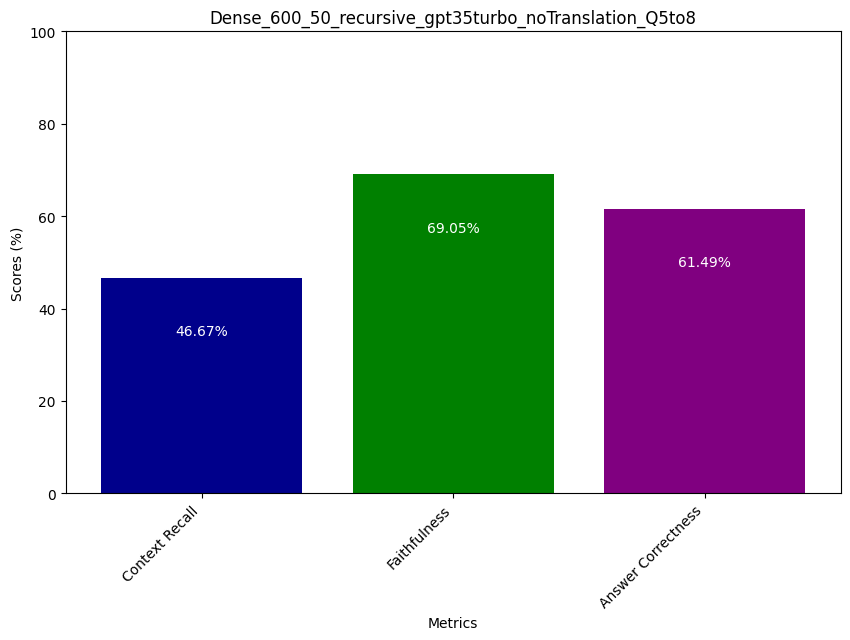

In [64]:
plot_evaluation(Dense_600_50_recursive_gpt35turbo_noTranslation_Q5to8)

In [1]:
import os, sys
os.getcwd()

'/teamspace/studios/this_studio/RAG-System-Optimization/notebooks'

In [2]:
os.chdir("..")
sys.path.append(os.getcwd())
os.getcwd()

'/teamspace/studios/this_studio/RAG-System-Optimization'

In [23]:
a = pd.read_csv('data/Dense_600_50_recursive_gpt35turbo_noTranslation_Q5to8.csv')

In [24]:
a.head()

question  \
0  What is the role of probate judges in the same...   
1  What are the risks and controversies associate...   
2  What is Mohammed Emwazi's background and how d...   

                                              answer  \
0  The role of probate judges in the same-sex mar...   
1  The risks and controversies associated with du...   
2  Mohammed Emwazi was a Kuwaiti-born individual ...   

                                            contexts  \
0  ['(CNN)The Alabama Supreme Court on Tuesday or...   
1  ['that it wasn\'t safer," Riley said. Last yea...   
2  ['a link. They say that the Kuwaiti-born Moham...   

                                        ground_truth  context_recall  \
0  The Alabama Supreme Court ordered probate judg...             1.0   
1  Duodenoscope procedures carry a low risk of ba...             0.5   
2  A man who says he's Mohammed Emwazi's father h...             0.0   

   faithfulness  answer_correctness  
0           1.0            0.987706  
1           0.4            0.544452  
2           1.0            0.386513

In [3]:
from scripts.ragas_evaluation import RagasEvaluation

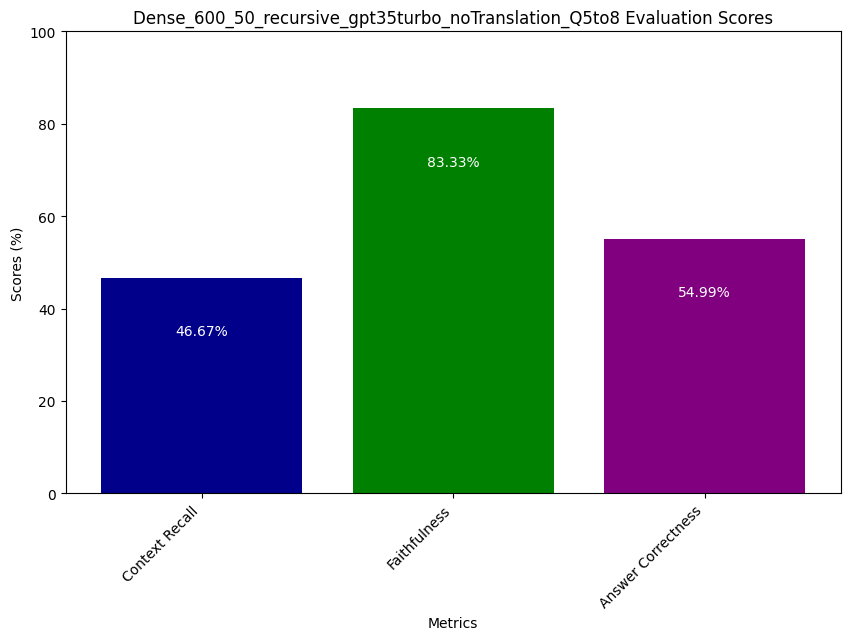

In [44]:
eval.plot_evaluation()

In [45]:
eval.result_df.head()

question  \
0  What is the role of probate judges in the same...   
1  What are the risks and controversies associate...   
2  What is Mohammed Emwazi's background and how d...   

                                              answer  \
0  The role of probate judges in the same-sex mar...   
1  The risks and controversies associated with du...   
2  Mohammed Emwazi was a Kuwaiti-born individual ...   

                                            contexts  \
0  [(CNN)The Alabama Supreme Court on Tuesday ord...   
1  [that it wasn't safer," Riley said. Last year,...   
2  [a link. They say that the Kuwaiti-born Mohamm...   

                                        ground_truth  context_recall  \
0  The Alabama Supreme Court ordered probate judg...             1.0   
1  Duodenoscope procedures carry a low risk of ba...             0.4   
2  A man who says he's Mohammed Emwazi's father h...             0.0   

   faithfulness  answer_correctness evolution_type  
0           1.0            0.987706         simple  
1           0.5            0.442038  multi_context  
2           1.0            0.219846  multi_context

In [46]:
eval_optimize_for_context_recall = RagasEvaluation(test_name="Dense_600_50_recursive_gpt35turbo_multiQuery_Q5to8")

Evaluating:   0%|          | 0/9 [00:00<?, ?it/s]

In [47]:
eval_optimize_for_context_recall.result_df.head()

question  \
0  What is the role of probate judges in the same...   
1  What are the risks and controversies associate...   
2  What is Mohammed Emwazi's background and how d...   

                                              answer  \
0  The role of probate judges in the same-sex mar...   
1  The risks and controversies associated with du...   
2  Mohammed Emwazi was Kuwaiti-born and grew up i...   

                                            contexts  \
0  [(CNN)The Alabama Supreme Court on Tuesday ord...   
1  [that it wasn't safer," Riley said. Last year,...   
2  [a link. They say that the Kuwaiti-born Mohamm...   

                                        ground_truth  context_recall  \
0  The Alabama Supreme Court ordered probate judg...        1.000000   
1  Duodenoscope procedures carry a low risk of ba...        1.000000   
2  A man who says he's Mohammed Emwazi's father h...        0.166667   

   faithfulness  answer_correctness evolution_type  
0      1.000000            0.987705         simple  
1      0.500000            0.439284  multi_context  
2      0.666667            0.373992  multi_context

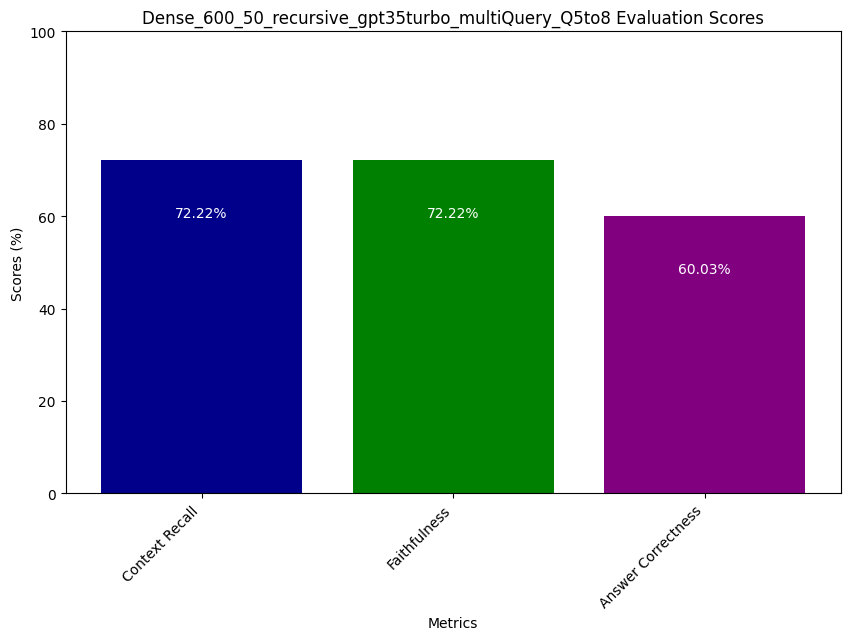

In [48]:
eval_optimize_for_context_recall.plot_evaluation()

In [49]:
eval_optimize_for_context_recall_weviate = RagasEvaluation(test_name="Hybrid_600_50_recursive_gpt35turbo_multiQuery_Q5to8")

Evaluating:   0%|          | 0/9 [00:00<?, ?it/s]

In [50]:
eval_optimize_for_context_recall_weviate.result_df.head()

question  \
0  What is the role of probate judges in the same...   
1  What are the risks and controversies associate...   
2  What is Mohammed Emwazi's background and how d...   

                                              answer  \
0  The role of probate judges in the same-sex mar...   
1  The risks and controversies associated with du...   
2  Mohammed Emwazi was born in Kuwait in 1988 and...   

                                            contexts  \
0  [(CNN)The Alabama Supreme Court on Tuesday ord...   
1  [and January and is offering them home tests t...   
2  [a link. They say that the Kuwaiti-born Mohamm...   

                                        ground_truth  context_recall  \
0  The Alabama Supreme Court ordered probate judg...        1.000000   
1  Duodenoscope procedures carry a low risk of ba...        0.800000   
2  A man who says he's Mohammed Emwazi's father h...        0.538462   

   faithfulness  answer_correctness evolution_type  
0           1.0            0.987706         simple  
1           1.0            0.503781  multi_context  
2           1.0            0.339178  multi_context

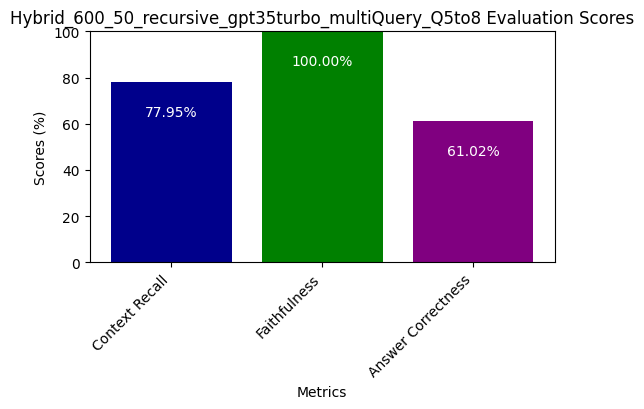

In [51]:
eval_optimize_for_context_recall_weviate.plot_evaluation()

In [8]:
eval_optimize_for_context_recall_semantic = RagasEvaluation(test_name="Hybrid_600_50_semantic_gpt35turbo_multiQuery_Q5to8")

Evaluating:   0%|          | 0/9 [00:00<?, ?it/s]

In [9]:
eval_optimize_for_context_recall_semantic.result_df.head()

question  ... evolution_type
0  What is the role of probate judges in the same...  ...         simple
1  What are the risks and controversies associate...  ...  multi_context
2  What is Mohammed Emwazi's background and how d...  ...  multi_context

[3 rows x 8 columns]

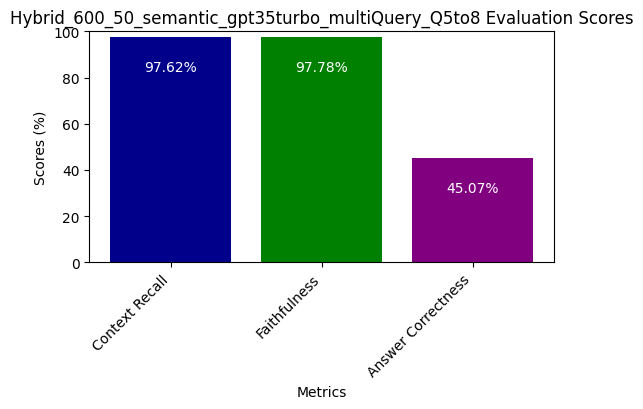

In [10]:
eval_optimize_for_context_recall_semantic.plot_evaluation()

In [7]:
eval_optimize_for_context_recall_semantic_noTranslation = RagasEvaluation(test_name="Hybrid_600_50_semantic_gpt35turbo_noTranslation_Q5to8")

Evaluating:   0%|          | 0/9 [00:00<?, ?it/s]

In [12]:
import pandas as pd
eval_optimize_for_context_recall_semantic_noTranslation.result_df.head()

question  \
0  What is the role of probate judges in the same...   
1  What are the risks and controversies associate...   
2  What is Mohammed Emwazi's background and how d...   

                                              answer  \
0  The role of probate judges in the same-sex mar...   
1  The risks and controversies associated with du...   
2  Mohammed Emwazi was born in Kuwait in 1988 and...   

                                            contexts  \
0  [(CNN)The Alabama Supreme Court on Tuesday ord...   
1  [I don't know," Riley said. "Can you imagine a...   
2  [(his last years) he had settled, he was worki...   

                                        ground_truth  context_recall  \
0  The Alabama Supreme Court ordered probate judg...        1.000000   
1  Duodenoscope procedures carry a low risk of ba...        1.000000   
2  A man who says he's Mohammed Emwazi's father h...        0.916667   

   faithfulness  answer_correctness evolution_type  
0           1.0            0.987706         simple  
1           1.0            0.434410  multi_context  
2           1.0            0.326651  multi_context

In [13]:
eval_optimize_for_context_recall_semantic_noTranslation.result_df['question'][2]

"What is Mohammed Emwazi's background and how does ISIS recruit young Muslims?"

In [14]:
eval_optimize_for_context_recall_semantic_noTranslation.result_df['ground_truth'][2]

'A man who says he\'s Mohammed Emwazi\'s father has reportedly said there is no proof that his son is the masked ISIS killer known as "Jihadi John." "There is nothing that proves what is being circulated in the media, especially through video clips and footage, that the accused is my son Mohammed, who is being referred to as the alleged executioner" of ISIS, Jassem Emwazi told the Kuwaiti newspaper al Qabas. Jassem Emwazi said there are only "false rumors" circulating about his son. The elder Emwazi told the newspaper he has hired an attorney. The lawyer, Kuwait-based Salem Al-Hashash, told CNN on Tuesday that he was representing Jassem Emwazi and planned to file lawsuits against anyone who has claimed that Mohammed Emwazi is Jihadi John. The lawyer called the father a "victim of libel" and said that he would soon hold a news conference. Last week, two U.S. officials and two U.S. congressional sources confirmed to CNN that "Jihadi John" is Mohammed Emwazi, a Kuwaiti-born Londoner. Jass

In [15]:
eval_optimize_for_context_recall_semantic_noTranslation.result_df['answer'][2]

'Mohammed Emwazi was born in Kuwait in 1988 and moved to the United Kingdom with his parents and sister when he was six. He attended Quintin Kynaston Community Academy in northwest London, where he was described as a quiet, hardworking boy with few friends. Despite his seemingly normal upbringing and good grades, he later became known as the ISIS militant "Jihadi John" who appeared in beheading videos of Western hostages.\n\nISIS recruits young Muslims, like Emwazi, through radical influences, likely outside of school or through social media. They target individuals who may feel torn between different cultures, and use social media to influence and manipulate them. Organizations like CAGE have suggested that individuals like Emwazi may have been driven to extremism by unwarranted harassment by security services, leading them to seek support and validation from extremist groups.'

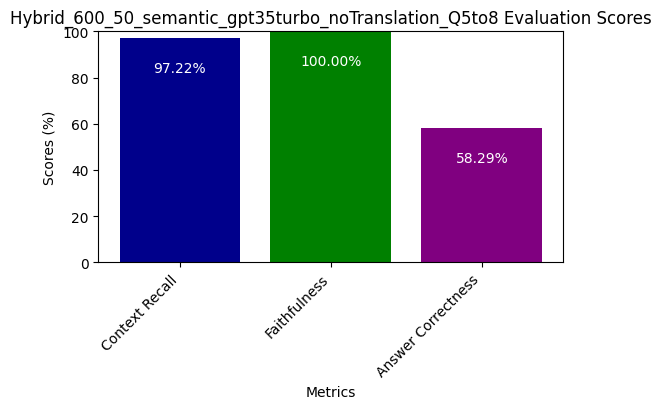

In [9]:
eval_optimize_for_context_recall_semantic_noTranslation.plot_evaluation()

In [6]:
Hybrid_600_50_semantic_gpt35turbo_noTranslation_Q5to11 = RagasEvaluation(
    test_name="Hybrid_600_50_semantic_gpt35turbo_noTranslation_Q5to11",
    number_of_questions = 6)

Evaluating:   0%|          | 0/18 [00:00<?, ?it/s]

In [10]:
Hybrid_600_50_semantic_gpt35turbo_noTranslation_Q5to11.result_df.head(8)

question  \
0  What is the role of probate judges in the same...   
1  What are the risks and controversies associate...   
2  What is Mohammed Emwazi's background and how d...   
3  What significant achievement did the Iraqi for...   
4  How does the hukou system impact left-behind c...   
5  What measures can be taken to improve security...   

                                              answer  \
0  The role of probate judges in the same-sex mar...   
1  The risks and controversies associated with du...   
2  Mohammed Emwazi was born in Kuwait but brought...   
3  The Iraqi forces gained control of Tikrit Mili...   
4  The hukou system in China impacts left-behind ...   
5  Some measures that can be taken to improve sec...   

                                            contexts  \
0  [(CNN)The Alabama Supreme Court on Tuesday ord...   
1  [I don't know," Riley said. "Can you imagine a...   
2  [(his last years) he had settled, he was worki...   
3  [Baghdad, Iraq (CNN)Iraqi forces appeared Wedn...   
4  [Chao Hu, Anhui, China (CNN)Six-year-old Lu Yi...   
5  [Robert Bales, a 38-year-old father of two, op...   

                                        ground_truth  context_recall  \
0  The Alabama Supreme Court ordered probate judg...            1.00   
1  Duodenoscope procedures carry a low risk of ba...            1.00   
2  A man who says he's Mohammed Emwazi's father h...            0.80   
3  The Iraqi forces captured key areas in their o...            0.25   
4  The hukou system in China has a significant im...            1.00   
5  As a psychologist, I would advocate for more r...            1.00   

   faithfulness  answer_correctness evolution_type  
0           1.0            0.987706         simple  
1           1.0            0.565715  multi_context  
2           1.0            0.520394  multi_context  
3           1.0            0.606231         simple  
4           1.0            0.703860      reasoning  
5           1.0            0.657958         simple

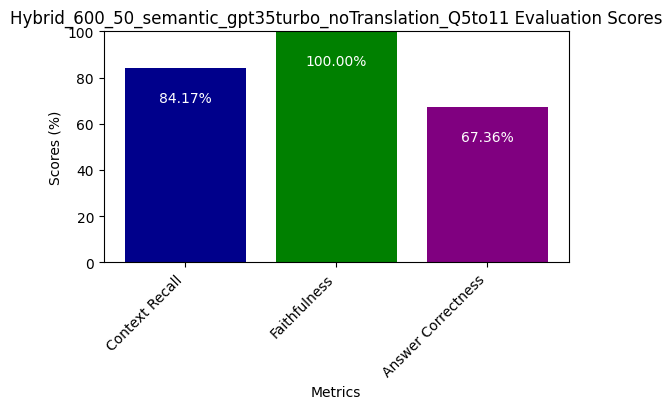

In [8]:
Hybrid_600_50_semantic_gpt35turbo_noTranslation_Q5to11.plot_evaluation()

In [13]:
Hybrid_600_50_semantic_gpt35turbo_noTranslation_Q5to11.result_df['question'][3]

'What significant achievement did the Iraqi forces make in their offensive to retake Tikrit from ISIS?'

In [14]:
Hybrid_600_50_semantic_gpt35turbo_noTranslation_Q5to11.result_df['answer'][3]

'The Iraqi forces gained control of Tikrit Military Hospital and raised the Iraqi flag from the hospital premises.'

In [15]:
Hybrid_600_50_semantic_gpt35turbo_noTranslation_Q5to11.result_df['ground_truth'][3]

'The Iraqi forces captured key areas in their offensive to retake Tikrit from ISIS. They raised the Iraqi flag over the governorate and the main hospital buildings in the city. They also liberated four neighborhoods in southern Tikrit. At least 26 militants were killed in the operation.'

In [1]:
Hybrid_600_50_semantic_gpt35turbo_noTranslation_Q5to11['question'][0]

NameError: name 'Hybrid_600_50_semantic_gpt35turbo_noTranslation_Q5to11' is not defined

In [4]:
Dense_600_50_semantic_gpt35turbo_noTranslation_Q5to11 = RagasEvaluation(
    test_name="Dense_600_50_semantic_gpt35turbo_noTranslation_Q5to11",
    number_of_questions = 6)

Evaluating:   0%|          | 0/18 [00:00<?, ?it/s]

In [5]:
Dense_600_50_semantic_gpt35turbo_noTranslation_Q5to11.result_df.head(8)

question  \
0  What is the role of probate judges in the same...   
1  What are the risks and controversies associate...   
2  What is Mohammed Emwazi's background and how d...   
3  What significant achievement did the Iraqi for...   
4  How does the hukou system impact left-behind c...   
5  What measures can be taken to improve security...   

                                              answer  \
0  The role of probate judges in the same-sex mar...   
1  The risks and controversies associated with du...   
2  Mohammed Emwazi was a Kuwaiti-born individual ...   
3  The Iraqi forces captured key areas in Tikrit,...   
4  The hukou system in China impacts left-behind ...   
5  Some measures that can be taken to improve sec...   

                                            contexts  \
0  [(CNN)The Alabama Supreme Court on Tuesday ord...   
1  [that it wasn't safer," Riley said. Last year,...   
2  [a link. They say that the Kuwaiti-born Mohamm...   
3  [(CNN)Iraqi forces say they've captured key ar...   
4  [and they cannot bring their children with the...   
5  [and stopping the flight." In the short term, ...   

                                        ground_truth  context_recall  \
0  The Alabama Supreme Court ordered probate judg...        1.000000   
1  Duodenoscope procedures carry a low risk of ba...        0.400000   
2  A man who says he's Mohammed Emwazi's father h...        0.000000   
3  The Iraqi forces captured key areas in their o...        0.750000   
4  The hukou system in China has a significant im...        0.000000   
5  As a psychologist, I would advocate for more r...        0.333333   

   faithfulness  answer_correctness evolution_type  
0           1.0            0.987706         simple  
1           0.5            0.458153  multi_context  
2           0.6            0.375019  multi_context  
3           1.0            0.572081         simple  
4           0.2            0.740833      reasoning  
5           0.0            0.653188         simple

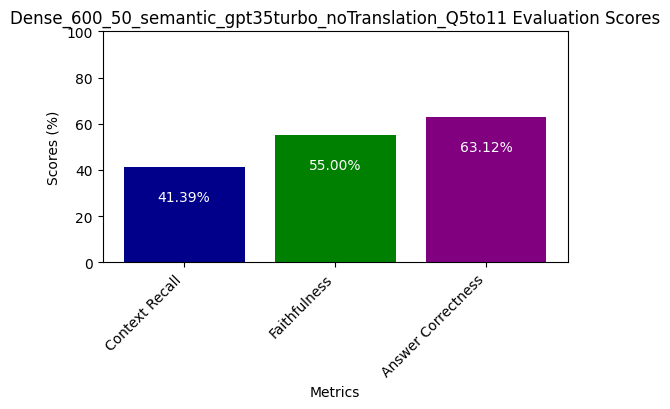

In [6]:
Dense_600_50_semantic_gpt35turbo_noTranslation_Q5to11.plot_evaluation()